In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Meta-Analysis of Gut Microbiome/Bikal/merge_all.csv')

<ipython-input-2-531bb56a9c56>:1: DtypeWarning: Columns (26360) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Meta-Analysis of Gut Microbiome/Bikal/merge_all.csv')


In [3]:
!pip install scikit-learn pandas numpy seaborn matplotlib scipy biom-format

# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 75.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for biom-format: filename=biom_format-2.1.16-cp311-cp311-linux_x86_64.whl size=12182963 sha256=aea0f2c6986986d66f5b2998fe3d49fd534eb3b59bdfbadfeb5747037684af75
  Stored in directory: /root/.cache/pip/wheels/a5/6b/58/a879e8fbae2479a3d1a68719f3a062fe62701d6494f1b74f5e
Successfully built biom-format


In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/Meta-Analysis of Gut Microbiome/Bikal/metadata_all.csv')

In [49]:
taxa = pd.read_csv("/content/drive/MyDrive/Meta-Analysis of Gut Microbiome/laptop stuff/taxa.csv")

In [50]:
data_ml = pd.read_csv('/content/drive/MyDrive/Meta-Analysis of Gut Microbiome/laptop stuff/data_ml.csv')

<ipython-input-50-bd7a6dbe0d22>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ml = pd.read_csv('/content/drive/MyDrive/Meta-Analysis of Gut Microbiome/laptop stuff/data_ml.csv')


In [53]:
data_ml.head()

,Unnamed: 0,Ethnicity,ASV1,ASV2,ASV3,ASV4,ASV5,ASV6,ASV7,ASV8,...,ASV26346,ASV26347,ASV26348,ASV26349,ASV26350,ASV26351,ASV26352,ASV26353,ASV26354,ASV26355
0,SRR6166631,Asian,0.0,0.0,0.0,8.039480,0.000000,5.488938,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR6166632,Asian,0.0,0.0,0.0,5.393628,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR6166633,Asian,0.0,0.0,0.0,0.000000,3.433987,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR6166634,Asian,0.0,0.0,0.0,0.000000,0.000000,5.117994,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR6166635,Asian,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

Unique Ethnicities after cleaning:
['Asian' 'Caucasian' 'Other' 'Hispanic/Latino' 'Multiracial'
 'African American' 'Native American']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   62   126   179 ... 26342 26343 26354] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Classification Report:
                  precision    recall  f1-score   support

African American       0.74      0.29      0.41        49
           Asian       0.35      0.80      0.49        50
       Caucasian       0.77      0.70      0.73       185
 Hispanic/Latino       0.14      0.06      0.08        17
     Multiracial       0.00      0.00      0.00         6
 Native American       0.00      0.00      0.00         0
           Other       0.00      0.00      0.00         2

        accuracy                           0.60       309
       macro avg       0.29      0.26      0.25       309
    weighted avg       0.64      0.60      0.59       309



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

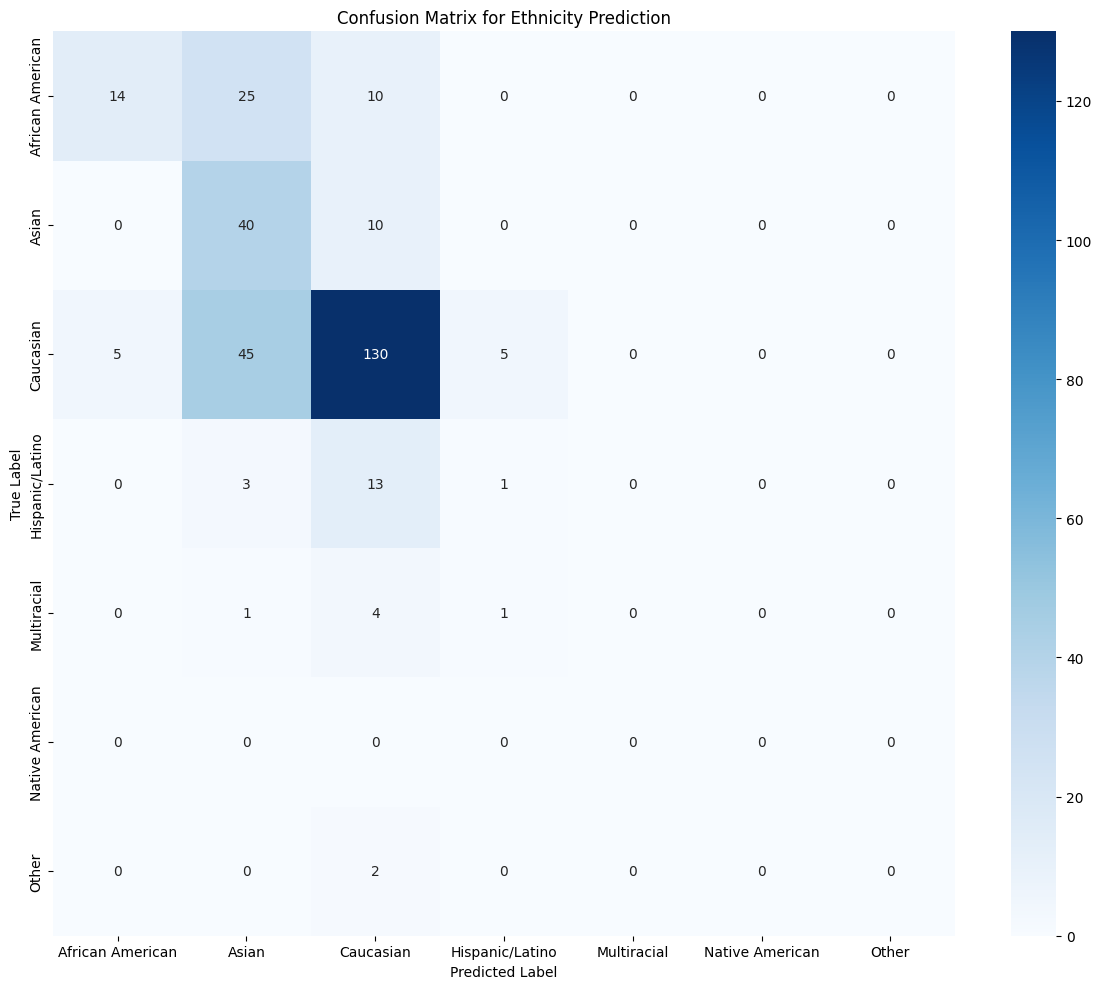

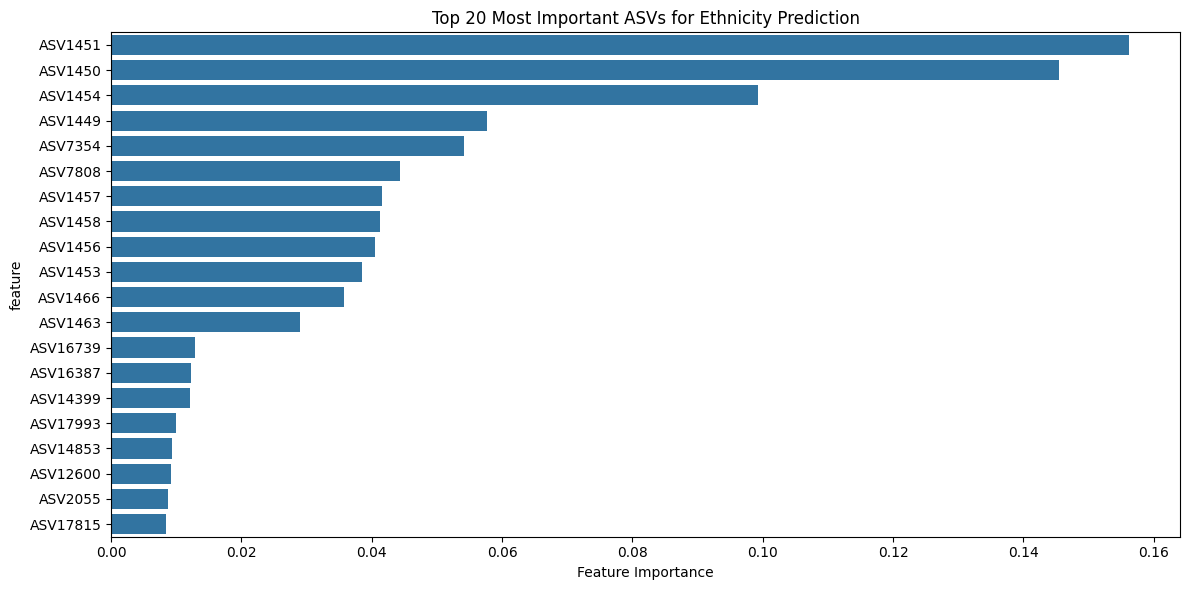

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Cross-validation Scores: [0.56680162 0.61538462 0.57894737 0.57489879 0.56097561]
Mean CV Score: 0.5794015996840131

Top 10 Most Important ASVs:
    feature  importance
2   ASV1451    0.156233
1   ASV1450    0.145539
4   ASV1454    0.099281
0   ASV1449    0.057695
13  ASV7354    0.054107
14  ASV7808    0.044311
6   ASV1457    0.041574
7   ASV1458    0.041276
5   ASV1456    0.040511
3   ASV1453    0.038460


In [78]:
# Ethnicity Prediction with Dynamic Label Handling
def preprocess_data(df):
    # Set the first column as index if it's 'Unnamed: 0'
    if df.columns[0] == 'Unnamed: 0':
        df = df.set_index('Unnamed: 0')

    # Remove rows with NaN values in the Ethnicity column
    df = df.dropna(subset=['Ethnicity'])

    # Remove unwanted ethnicity labels
    unwanted_labels = ['error', 'mock']
    df = df[~df['Ethnicity'].isin(unwanted_labels)]

    # Ensure Ethnicity is converted to string
    df['Ethnicity'] = df['Ethnicity'].astype(str)

    # Separate features and target
    X = df.drop('Ethnicity', axis=1)
    y = df['Ethnicity']

    # Convert all feature columns to numeric, coercing errors to NaN
    X = X.apply(pd.to_numeric, errors='coerce')

    # Fill NaN values with 0
    X = X.fillna(0)

    return X, y

def ethnicity_prediction_pipeline(X, y):
    # Encode target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Get original class names before encoding
    # Use only the classes that are actually present
    unique_classes = np.unique(y_encoded)
    class_names = [le.classes_[i] for i in unique_classes]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Feature Selection: Select top K best features
    selector = SelectKBest(score_func=f_classif, k=min(50, X.shape[1]))
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Get selected feature names
    selected_feature_names = X.columns[selector.get_support()].tolist()

    # Train Random Forest Classifier
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'
    )
    rf_model.fit(X_train_selected, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test_selected)

    # Evaluation
    print("\nClassification Report:")
    print(classification_report(
        y_test,
        y_pred,
        labels=unique_classes,
        target_names=class_names
    ))

    # Confusion Matrix Plotting with class names
    cm = confusion_matrix(y_test, y_pred, labels=unique_classes)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix for Ethnicity Prediction')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Feature Importance
    feature_importance = pd.DataFrame({
        'feature': selected_feature_names,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Visualize Top 20 Important Features
    plt.figure(figsize=(12, 6))
    feature_imp_top20 = feature_importance.head(20)
    sns.barplot(x='importance', y='feature', data=feature_imp_top20)
    plt.title('Top 20 Most Important ASVs for Ethnicity Prediction')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

    # Cross-validation
    cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5)
    print("\nCross-validation Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())

    return rf_model, feature_importance

# Main Execution
# Preprocess the data
X, y = preprocess_data(data_ml)

# Print unique ethnicities after cleaning
print("Unique Ethnicities after cleaning:")
print(y.unique())

# Run the prediction pipeline
model, important_features = ethnicity_prediction_pipeline(X, y)

# Print top 10 most important features
print("\nTop 10 Most Important ASVs:")
print(important_features.head(10))